In [1]:
from math import factorial

n количество отправленных писем 4

k число открытых писем 3 (событие А)

p вероятность события 4 = 0.5
q вероятность события Не а = 1-0.5

порядок открытия писем не имеет значения, нужно найти число сочетаний из 4 по 3.

Вероятность, что клиент откроет письмо, равна 0.5. Если вы отправили письма 4 клиентам, какова вероятность, что ровно 3 из них откроют письмо?

если события независимы, то вероятность совместного наступления всех событий равна произведению их вероятностей: 

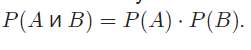
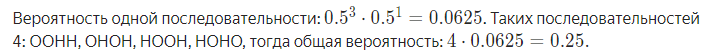
решим с помощью формулы бернулли
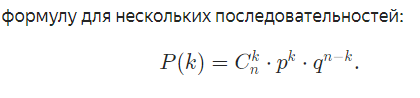

In [7]:
# отправили письма 4 клиентам
n = 4 

k = 3
combination = (
    factorial(n)/
    (factorial(k)*
    factorial(n - k)
    )
)
# каждое из них открыли с вероятностью p=0.5
p=0.5
# каждое из них НЕ открыли с вероятностью q=1-p
q=1-p
# вероятност открытия к из n писем
probability_а = combination*p**k*q**(n-k)

print('Количество сочетаний 3 открытых писем из 4:', int(combination), 
', вероятность, что ровно 3 из них откроют письмо:', probability_а)

Количество сочетаний 3 открытых писем из 4: 4 , вероятность, что ровно 3 из них откроют письмо: 0.25


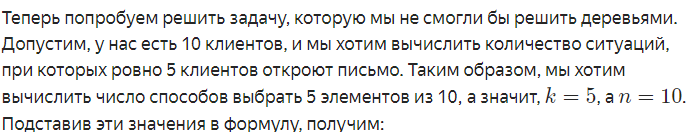
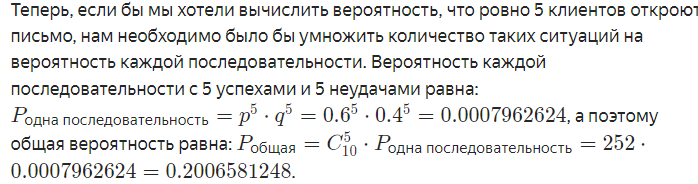

In [8]:
# отправили письма 4 клиентам
n = 10 

k = 5
combination = (
    factorial(n)/
    (factorial(k)*
    factorial(n - k)
    )
)
# каждое из них открыли с вероятностью p
p=0.6
# каждое из них НЕ открыли с вероятностью q=1-p
q=1-p
# вероятност открытия к из n писем
probability_а = combination*p**k*q**(n-k)

print('Количество сочетаний открытых писем :', int(combination), 
', вероятность, что из них откроют письмо:', probability_а)

Количество сочетаний открытых писем : 252 , вероятность, чтоиз них откроют письмо: 0.20065812480000003


### Как визуализировать график биномиального распределения
Теперь расскажем, как самостоятельно визуализировать функцию вероятности биномиального распределения. Что будет отражено на графике:
 - На оси X — число успеховk (от0 доn).
 - На оси Y — вероятностьP(k) для каждого k.
 
Здесь понадобится библиотека Python, которая ещё не раз вам поможет в работе со статистическими инструментами, — scipy. Из этой библиотеки сейчас понадобится модуль binom, который представляет собой инструмент для моделирования биномиального распределения.
Как и в расчётах неавтоматизированных, для работы с биномиальным распределением понадобится три числа: точка, в которой хотим вычислить вероятность, а также два параметра биномиального распределения. Сначала создадим объект распределения с помощью binom(), чтобы потом применить к нему разные инструменты. Для создания объекта биномиального распределения потребуется два параметра:
 - n — общее количество испытаний в биномиальном эксперименте;
 - p — вероятность успеха.

**Код dist = binom(n, p)**  создаст объект распределения и сохранит его в переменную.

Затем используем **метод dist.pmf()**  — он вычислит значение вероятности в конкретной точке определённого биномиального распределения. 

Методу передадим значение k — количество успехов в событии, вероятность которого вы считаете.

Поработаем с методом на примере эксперимента, график которого мы вам уже показывали:


зададим распределение как отдельную переменную dist, а после этого используем метод pmf() для вычисления вероятности в каждой точке.

In [9]:
# Импортируем биномиальное распределение из библиотеки scipy.stats
from scipy.stats import binom

n = 10  # Задаём количество испытаний — общее количество экспериментов
p = 0.3  # Задаём вероятность успеха в одном испытании

# Создаём биномиальное распределение с параметрами n (число испытаний) и p (вероятность успеха)
dist = binom(n, p)

# Цикл, который выводит вероятности для всех возможных значений успехов (от 0 до n+1)
for k in range(n + 1):
# Используем метод pmf(), чтобы вывести вероятность того, что будет ровно k успехов
    print(k, dist.pmf(k))

0 0.0282475249
1 0.12106082099999989
2 0.2334744405000001
3 0.26682793199999977
4 0.2001209489999999
5 0.10291934519999989
6 0.036756908999999956
7 0.009001691999999992
8 0.0014467004999999982
9 0.00013778099999999988
10 5.9048999999999975e-06


Как можем заметить, значение 3 действительно является наиболее вероятным, а значит, график нас не обманул. Теперь покажем код для построения такого графика:

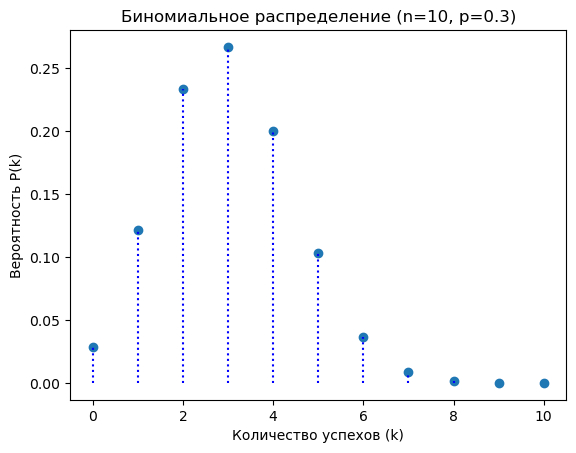

In [10]:
# Импортируем библиотеку для построения графиков
import matplotlib.pyplot as plt 
# Импортируем биномиальное распределение из scipy.stats
from scipy.stats import binom 

n = 10  # Общее количество испытаний
p = 0.3  # Вероятность успеха в одном испытании

probabilities = []  # Список для хранения вероятностей
dist = binom(n, p)  # Создаём биномиальное распределение с параметрами n и p

# Вычисляем вероятности для каждого количества успехов от 0 до n+1
for k in range(n + 1):
    probabilities.append(dist.pmf(k))

# Построение графика биномиального распределения
# Отображаем точки на графике
plt.scatter(range(n + 1), probabilities)
# Отображаем вертикальные линии от оси до точек
plt.vlines(range(n + 1), 0, probabilities, colors='blue', linestyles='dotted') 
# Добавляем подпись оси X
plt.xlabel('Количество успехов (k)') 
# Добавляем подпись оси Y
plt.ylabel('Вероятность P(k)')
# Добавляем заголовок графика
plt.title('Биномиальное распределение (n=10, p=0.3)') 
# Отображаем график
plt.show()

Задание 1 из 1
Постройте график биномиального распределения с параметрами n = 48 и p = 0.5. Укажите значения параметров в коде ниже, а также соберите список probabilities с вероятностями каждого исхода.

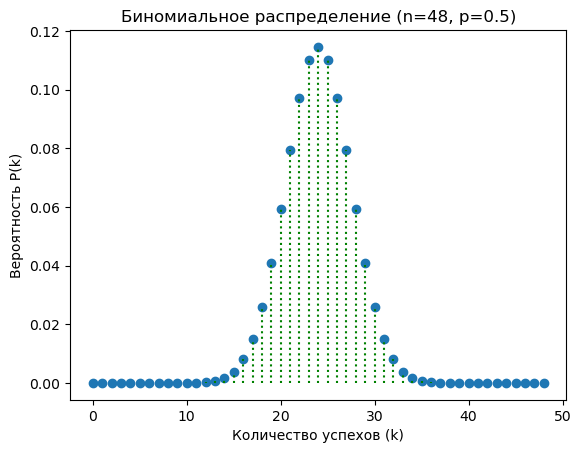

In [14]:
import matplotlib.pyplot as plt
from scipy.stats import binom

probabilities = []

n = 48 # Задаём количество испытаний — общее количество экспериментов
p = 0.5  # Вероятность успеха в одном испытании

# Создаём биномиальное распределение с параметрами n и p
dist = binom(n, p)  
# Вычисляем вероятности для каждого количества успехов от 0 до n+1
for k in range(n+1):
    probabilities.append(dist.pmf(k))

# Построение графика биномиального распределения
# Отображаем точки на графике
plt.scatter(range(n + 1), probabilities)
# Отображаем вертикальные линии от оси до точек
plt.vlines(range(n + 1), 0, probabilities, colors='green', linestyles='dotted') 
# Добавляем подпись оси X
plt.xlabel('Количество успехов (k)') 
# Добавляем подпись оси Y
plt.ylabel('Вероятность P(k)')
# Добавляем заголовок графика
plt.title(f'Биномиальное распределение (n={n}, p={p})') 
# Отображаем график
plt.show()

### Рассчитываем распределение Пуассона
У распределения Пуассона всего один параметр λ
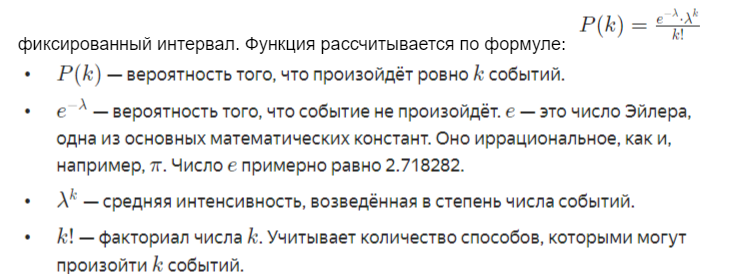


#### как визуализировать распределение Пуассона
Для работы с распределением Пуассона снова понадобится библиотека scipy. В этот раз из неё возьмём модуль poisson.


Сначала создадим объект распределения с помощью poisson() из scipy.stats. 

Для объекта распределения Пуассона потребуется один параметр λ, который представляет собой среднее число событий за фиксированный интервал времени.

Зададим его равным 5: lam = 5. 


Затем к объекту распределения применим метод pmf() со значением k  это количество событий, вероятность которых хотим вычислить.

Функция вычислит вероятность того, что произойдёт ровно k событий при заданном среднем числе событий λ.

In [15]:
# Импортируем распределение Пуассона из библиотеки scipy.stats
from scipy.stats import poisson

lam = 5  # Задаём параметр λ, который представляет собой среднее число событий
k = 10   # Значение k, для которого мы хотим вычислить вероятность (количество событий)

# Создаём распределение Пуассона с заданным параметром λ
dist = poisson(lam)

# Вычисляем вероятность того, что произойдёт ровно k событий, используя функцию вероятности PMF
print(dist.pmf(k))

0.018132788707821854


In [16]:
# Импортируем распределение Пуассона из библиотеки scipy.stats
from scipy.stats import poisson

lam = 5  # Задаём параметр λ (среднее число событий)

# Создаём распределение Пуассона с заданным параметром λ
dist = poisson(lam)

# Выводим вероятности для всех значений событий (от 0 до 10)
for k in range(11):
    print(k, dist.pmf(k))  # Выводим вероятность того, что произойдёт ровно k событий

0 0.006737946999085467
1 0.03368973499542734
2 0.08422433748856832
3 0.1403738958142805
4 0.17546736976785063
5 0.17546736976785068
6 0.1462228081398754
7 0.10444486295705395
8 0.06527803934815865
9 0.036265577415643714
10 0.018132788707821854


Значение вероятности достигает пика при k = 5, что логично, так как это среднее значение λ. Теперь можно построить график этого распределения — принцип будет похож на тот, что был в прошлом уроке для биномиального распределения. Чтобы форма графика была более заметна, увеличим диапазон k до 20.


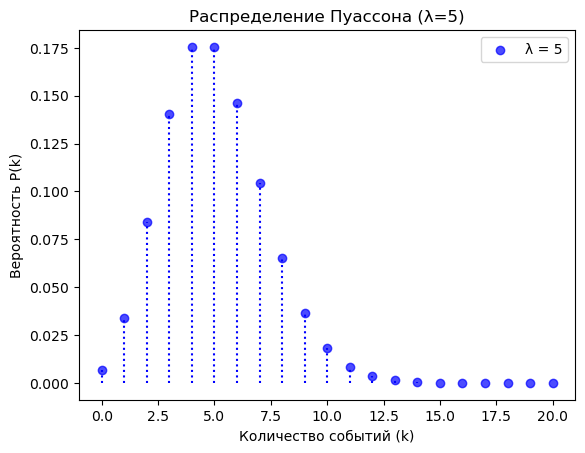

In [17]:
# Импортируем библиотеку для построения графиков
import matplotlib.pyplot as plt
# Импортируем распределение Пуассона из scipy.stats
from scipy.stats import poisson

lam = 5  # Среднее число событий

k_max = 20  # Возможные значения k от 0 до 20
probabilities = []  # Список для хранения вероятностей
dist = poisson(lam)  # Создаём распределение Пуассона с заданным параметром λ

# Вычисляем вероятности для каждого значения k
for k in range(k_max + 1):
    probabilities.append(dist.pmf(k))  # Применяем PMF (функцию вероятности) для k успехов

# Построение графика распределения Пуассона
# Отображаем точки на графике
plt.scatter(range(k_max + 1), probabilities, color='blue', alpha=0.7, label=f'λ = {lam}')
# Отображаем вертикальные линии от оси до точек
plt.vlines(range(k_max + 1), 0, probabilities, colors='blue', linestyles='dotted')
# Добавляем подпись оси X
plt.xlabel('Количество событий (k)')
# Добавляем подпись оси Y
plt.ylabel('Вероятность P(k)')
# Добавляем заголовок графика
plt.title('Распределение Пуассона (λ=5)')
# Добавляем легенду
plt.legend()
# Отображаем график
plt.show()  

Задание 1 из 1  
Напишите код для построения графика функции распределения Пуассона с параметром λ=10 для k=0…25. 

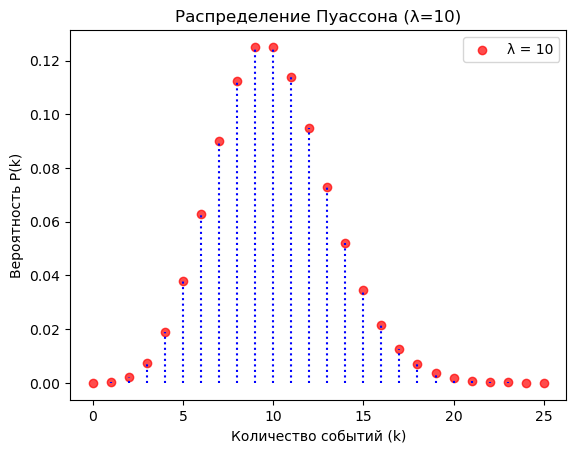

In [18]:
# Импортируем библиотеку для построения графиков
import matplotlib.pyplot as plt
# Импортируем распределение Пуассона из scipy.stats
from scipy.stats import poisson

lam = 10 # Напишите значение параметра здесь
k_max = 25 # Напишите значение здесь

probabilities = []
dist = poisson(lam)
# Применяем PMF (функцию вероятности) для k успехов
for k in range(k_max +1):
    probabilities.append(dist.pmf(k))

# Построение графика распределения Пуассона
# Отображаем точки на графике
plt.scatter(range(k_max + 1), probabilities, 
            color='red', 
            alpha=0.7, 
            label=f'λ = {lam}') # подпись в легенде
# Отображаем вертикальные линии от оси до точек
plt.vlines(range(k_max + 1), 
           0, 
           probabilities, 
           colors='blue', 
           linestyles='dotted')
# Добавляем подпись оси X
plt.xlabel('Количество событий (k)')
# Добавляем подпись оси Y
plt.ylabel('Вероятность P(k)')
# Добавляем заголовок графика
plt.title('Распределение Пуассона (λ=10)')
# Добавляем легенду
plt.legend()
# Отображаем график
plt.show()

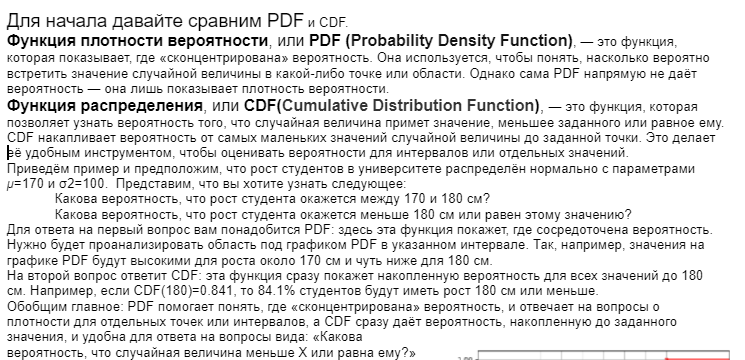

## Нормальное распределение и плотность вероятности


In [19]:
import numpy as np
from scipy.stats import norm

# Параметры распределения

mu = 170  # Среднее значение

sigma2 = 30 # Дисперсия

sigma = np.sqrt(sigma2)  # Вычисляем корень из дисперсии

dist = norm(mu, sigma)  # Задаём нормальное распределение с выбранными параметрами

prob = dist.pdf(150) # Вычисляем плотность вероятности того, что рост человека составляет 150 см

print("Плотность вероятности того, что рост человека составляет 150 см, равна:", prob)

Плотность вероятности того, что рост человека составляет 150 см, равна: 9.269427082481593e-05


В результате получим, что такая вероятность равна 9.269427082481593e-05, что достаточно немного. Такая запись называется **«экспоненциальной»**, и число при этом равно 9.26…⋅10 −5  =0.0000926…
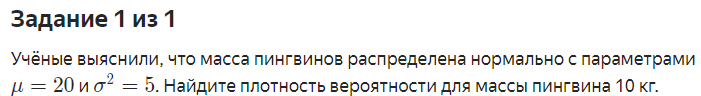

In [20]:
import numpy as np
from scipy.stats import norm

# Параметры распределения
mu = 20 # Среднее значение

sigma2 = 5 # Дисперсия

sigma = np.sqrt(sigma2) # Вычисляем корень из дисперсии
# Задаём нормальное распределение с выбранными параметрами
dist = norm(mu, sigma)
# Вычисляем плотность вероятности того, что масса пингвина 10 кг.
prob = dist.pdf(10)

print("Плотность вероятности того, что масса пингвина составляет 10 кг, равна:", prob)

Плотность вероятности того, что масса пингвина составляет 10 кг, равна: 8.099910956089102e-06


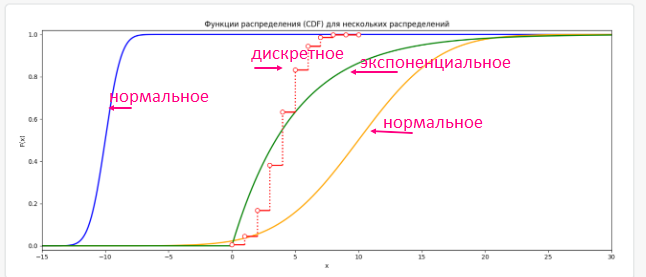
непрерывное распределение — экспоненциальное. У него не такой плавный рост, и оно достаточно резкое в самом начале.

нормальныое -  плавно растёт и плавно затухает, , а его центр лежит по оси Y в точке 0.5.

дискретное распределение, а значит, оно не может быть нормальным.

Распределение на оранжевом графике более плавно растёт, что говорит о большем параметре σ2 .

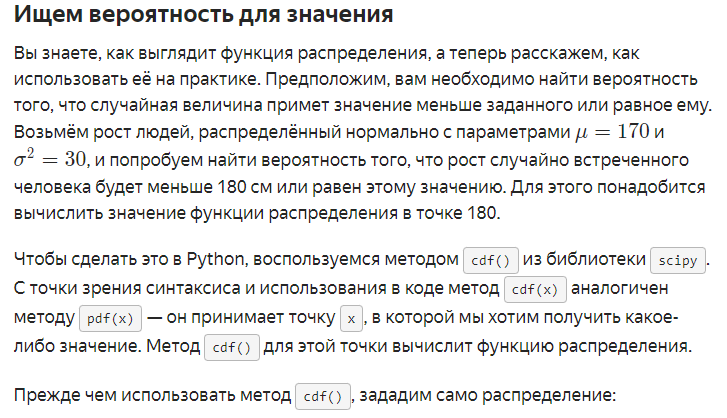

In [21]:
# Импортируем модуль norm из библиотеки scipy.stats для работы с нормальным распределением
from scipy.stats import norm 
# Импортируем библиотеку numpy для математических операций
import numpy as np 

# Задаём параметры нормального распределения
mu = 170 # mu — среднее значение
sigma2 = 30  # sigma2 — дисперсия

sigma = np.sqrt(sigma2)  # Вычисляем стандартное отклонение (sigma) как корень из дисперсии

# Определяем значение, для которого будем вычислять функцию распределения
value = 180  # Это значение, для которого будем искать накопленную вероятность

# Создаём объект нормального распределения с параметрами mu и sigma
dist = norm(mu, sigma)

# Вычисляем вероятность того, что случайная величина меньше или равна указанному значению
prob = dist.cdf(value)  # Используем CDF для нахождения накопленной вероятности

# Выводим результат в виде форматированной строки с округлением вероятности до двух знаков
print(f"Вероятность, что значение меньше или равно {value}: {prob:.2f}")

Вероятность, что значение меньше или равно 180: 0.97


В результате получим, что вероятность того, что значение меньше или равно 180, равна 0.97. Значит, вероятность того, что случайный человек будет ростом 180 сантиметров или меньше, равна 97%.

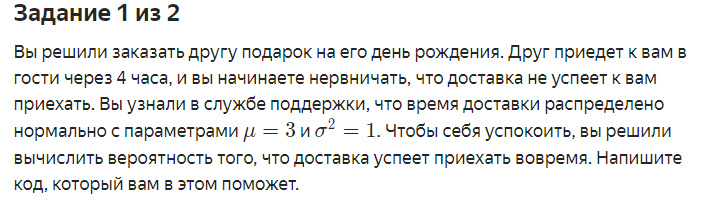

In [23]:
# Импортируем модуль norm из библиотеки scipy.stats для работы с нормальным распределением
from scipy.stats import norm 
# Импортируем библиотеку numpy для математических операций
import numpy as np

# Задайте параметры нормального распределения
mu =  3
sigma2 = 1

# Вычисляем стандартное отклонение (sigma) как корень из дисперсии
sigma = np.sqrt(sigma2)

# Определяем значение, для которого будем вычислять функцию распределения
value = 4  # Это значение, для которого будем искать накопленную вероятность


# Создаём объект нормального распределения с параметрами mu и sigma
dist = norm(mu, sigma)

# вероятность того, что случ/ величина меньше указанного знач/ или равна ему
prob = dist.cdf(value)

# Выводим результат с округлением вероятности до двух знаков
print(f"Вероятность того, что доставка приедет за {value} часа(ов) или \
быстрее: {prob:.2f}")

Вероятность того, что доставка приедет за 4 часа(ов) или быстрее: 0.84


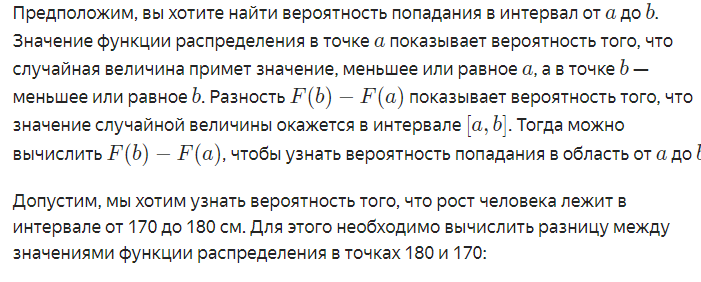

In [24]:
from scipy.stats import norm
import numpy as np

# Параметры нормального распределения
mu = 170
sigma2 = 30

# Значения, в которых мы хотим вычислить функцию распределения
low = 170
high = 180

sigma = np.sqrt(sigma2)

dist = norm(mu, sigma)

prob_interval = dist.cdf(high) - dist.cdf(low) # Вычисляем вероятность
print(f"Вероятность, что значение в интервале [{low}, {high}]: {prob_interval:.2f}")

Вероятность, что значение в интервале [170, 180]: 0.47


Значит, вероятность того, что случайный человек будет ростом от 170 до 180 см, равна 47%. 
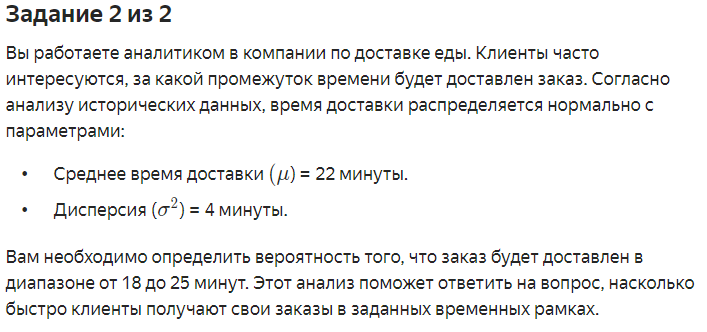



In [25]:
from scipy.stats import norm
import numpy as np

# Среднее время доставки
mu = 22
# Дисперсия
sigma2 = 4

# значения интервала от low до high
low =  18
high = 25

sigma = np.sqrt(sigma2)
# Создаём объект нормального распределения с параметрами mu и sigma
dist = norm(mu, sigma)
# вероятность попадания в интервал от low до high.
# из вероятности с наибольшей границей интервала вычтем вероятность с
# наименьшей границей интервала - получим вероятность в перделах нашего интервала
prob_interval =  dist.cdf(high) - dist.cdf(low)

# Выводим результат
print(f"Вероятность того, что заказ будет доставлен за {low}-{high} минут: {prob_interval:.2f}")

Вероятность того, что заказ будет доставлен за 18-25 минут: 0.91


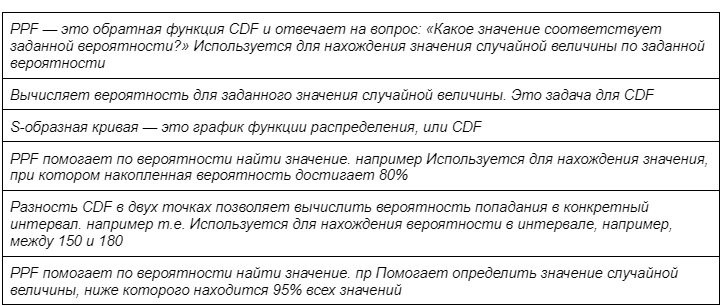

## PPF в Python
Теперь посмотрим на то, как PPF используется в Python. Метод ppf() из библиотеки scipy позволяет вычислить значение случайной величины, соответствующее заданной вероятности. Это обратный метод для cdf(), который возвращает вероятность для заданного значения.
Метод ppf() принимает на вход вероятность (число от 0 до 1), например 0.95, как и математическая функция, которую мы обсуждали выше. Сам метод может быть вызван для любого распределения из тех, что мы обсуждали ранее: binom, poisson, norm.

In [26]:
# Импортируем модуль norm для работы с нормальным распределением
from scipy.stats import norm
# Импортируем numpy для выполнения математических операций
import numpy as np 

# Параметры распределения
mu = 170 # Среднее значение
sigma2 = 30  # Дисперсия

# Вычисляем стандартное отклонение (sigma) как квадратный корень из дисперсии
sigma = np.sqrt(sigma2)

prob = 0.90  # Вероятность, для которой хотим найти значение (90% случаев)

# Создаём объект нормального распределения с параметрами mu и sigma
dist = norm(mu, sigma)

# Используем метод ppf() для нахождения значения, соответствующего 90% вероятности
# ppf() возвращает значение случайной величины, ниже которого лежат prob% всех случаев
value = dist.ppf(prob)  

# Выводим результат: значение роста, ниже которого находятся 90% вероятностей
print(f"Рост, соответствующий 90% вероятности: {value:.2f} см")

Рост, соответствующий 90% вероятности: 177.02 см


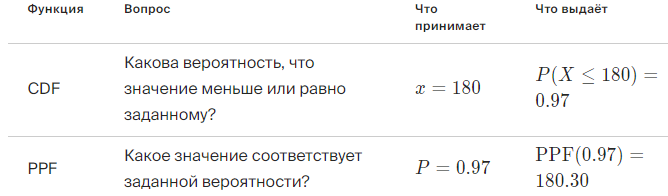

Вернёмся к примеру с ростом и посмотрим, как работает каждый инструмент:

 - Найдём вероятность того, что рост составляет 180 см или меньше, с помощью CDF.
 - Найдём значение роста, соответствующее 97% вероятности, с помощью PPF.

In [27]:
# Импортируем модуль norm для работы с нормальным распределением
from scipy.stats import norm 
# Импортируем numpy для выполнения математических операций
import numpy as np 

# Параметры распределения
mu = 170 # Среднее значение
sigma2 = 30  # Дисперсия

# Вычисляем стандартное отклонение (sigma) как квадратный корень из дисперсии
sigma = np.sqrt(sigma2)

# Создаём объект нормального распределения с параметрами mu и sigma
dist = norm(mu, sigma)

# Используем CDF и найдём вероятность, что рост меньше или равен 180

prob_cdf = dist.cdf(180)

print(f"Вероятность, что рост меньше 180 см: {prob_cdf:.2f}")

# Используем PPF и найдём рост для 97% вероятности

value_ppf = dist.ppf(0.97)

print(f"Рост, соответствующий 97% вероятности: {value_ppf:.2f} см")

Вероятность, что рост меньше 180 см: 0.97
Рост, соответствующий 97% вероятности: 180.30 см


Вы решили определить, какое количество пустых стаканов для кофе хватит в кофейне на день с вероятностью 75%, зная, что количество заказанных кофейных напитков в день распределено нормально с параметрамиμ=40 иσ2=16


In [28]:
from scipy.stats import norm
import numpy as np

mu = 40
sigma2 = 16

sigma = np.sqrt(sigma2)
dist = norm(mu, sigma)

prob = 0.75
value = dist.ppf(prob)
print(f"Количество стаканов, соответствующее 75% вероятности: {value:.2f}")

Количество стаканов, соответствующее 75% вероятности: 42.70


Задание 1 из 1  
Вы анализируете данные логистической компании. Среднее время доставки товара составляет 3 дня, дисперсия времени доставки равна 4. Руководство попросило вас определить, через какое количество дней доставка будет завершена в 99% случаев. Используйте метод ppf() для нахождения этого значения.

In [29]:
from scipy.stats import norm
import numpy as np

# Задайте параметры нормального распределения
mu = 3
sigma2 = 4

sigma = np.sqrt(sigma2)
dist = norm(mu, sigma)
prob = 0.99
delivery_time = dist.ppf(prob)

print(f"Время доставки для 99% случаев: {delivery_time:.2f} дня")

Время доставки для 99% случаев: 7.65 дня


Важно знать и уметь пользоваться PPF — эта функция используется, когда нужно найти значения, соответствующие определённым уровням вероятности. Это особенно полезно:
 -Для анализа квантилей. Например, для поиска 25, 50 и 75-го процентилей.
 - Для оценки порогов. Можно определить порог, при котором вероятность достижения цели составляет Х%.
 - В статистическом моделировании. Например, при проверке гипотез PPF помогает определить значение, при котором вероятность события становится критически малой, чтобы принять или отклонить гипотезу.


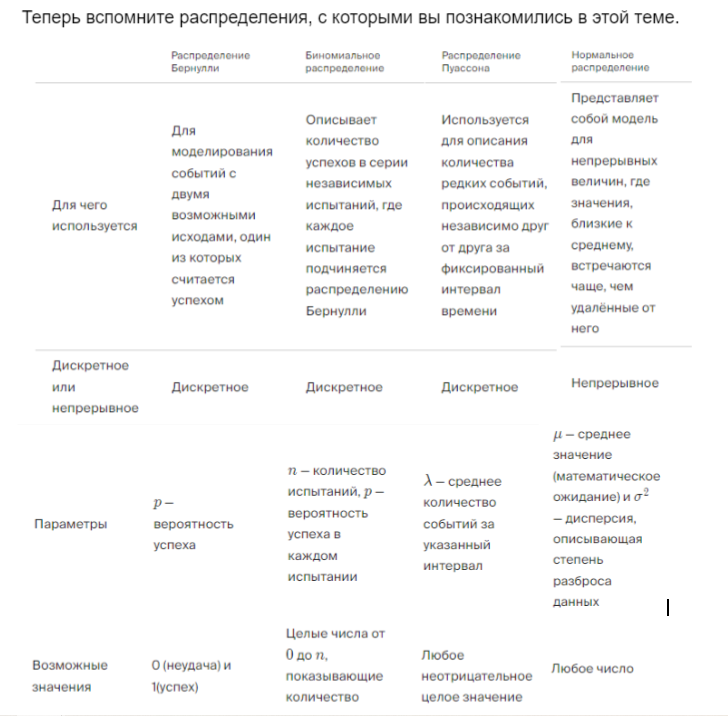